In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import osmnx as ox

import warnings
warnings.filterwarnings('ignore') 

import os
print(os.getcwd())

import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

/Users/max/sync/cornell/2021_FA_Final_Project/spoke/notebooks/maxdumas


In [2]:
from spoke.graphing import SO_34_POLY
from spoke.datasets import load_normalized_crash_gdf, load_consolidated_mnh_below_34th, load_danger_df

In [3]:
G = load_consolidated_mnh_below_34th()

# Danger Metric Node Map

In [4]:
danger_df = load_danger_df()

I guess what we'd want to do here is just have the circle scale in size corresponding to that and then also have a low alpha channel so that they blend together.

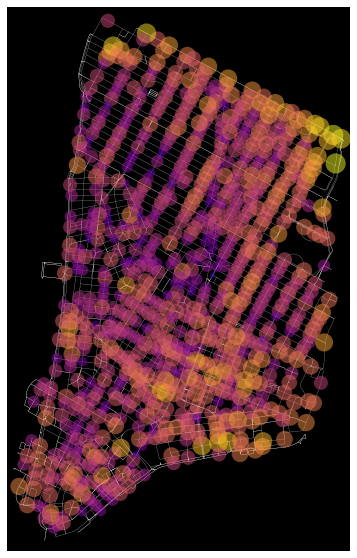

(<Figure size 720x720 with 1 Axes>, <AxesSubplot:>)

In [5]:
# Now we set the node attributes to be this crash count
nx.set_node_attributes(G, dict(danger_df.DANGER), "danger")
# Now we map these to colors
nc = ox.plot.get_node_colors_by_attr(G, "danger", cmap="plasma")

# Now we plot the graph with the colors
ox.plot_graph(
    G,
    figsize=(10, 10),
    node_color=nc,
    node_size=danger_df.DANGER * 64,
    node_alpha=0.5,
    node_zorder=2,
    edge_linewidth=0.2,
    edge_color="w",
    bgcolor="k",
)

In [6]:
from shapely.affinity import translate

# Note that I am clipping the top ~40 meters of the map off to help remove edge effects
offset = -0.0003
mnh_street_angle = np.pi / 6 # Manhattan's streets are about 30 degrees off of true north.
clip_boundary = translate(SO_34_POLY, yoff=offset, xoff=np.sin(mnh_street_angle) * offset)
ns = ox.utils_graph.graph_to_gdfs(G, edges=False).to_crs('EPSG:4326').clip(clip_boundary)

# Danger Metric Heatmap

In [7]:
def make_heatmap(data, weights=None):
    import geopandas as gpd
    import geoplot as gplt
    import geoplot.crs as gcrs
    import contextily as cpr

    ax = gplt.kdeplot(data, weights=weights, bw_adjust=0.5, cmap='plasma', projection=gcrs.WebMercator(), fill=True, figsize=(12, 12), alpha=0.7)
    gplt.webmap(data, provider=cpr.providers.Stamen.Toner, ax=ax)
    return ax

<GeoAxesSubplot:>

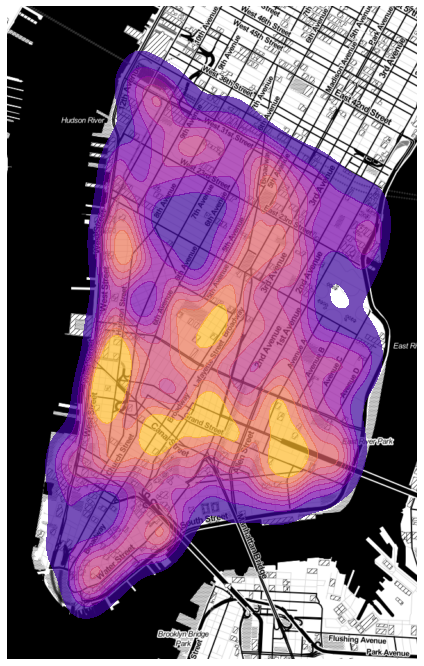

In [8]:
make_heatmap(ns, ns.danger)

# Crash Count Heatmap for all NYC

<GeoAxesSubplot:>

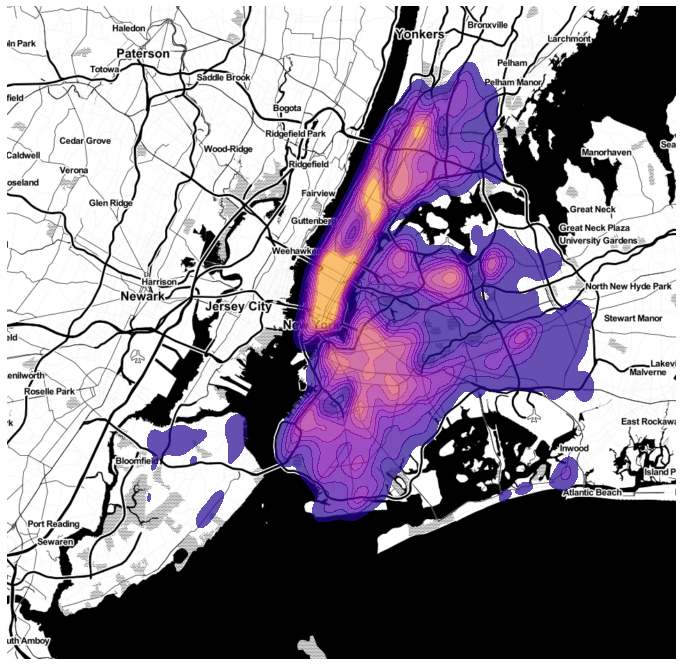

In [9]:
cs = load_normalized_crash_gdf(with_nodes=False)
make_heatmap(cs)

# Crash Count Heatmap for MNH below 34th St

<GeoAxesSubplot:>

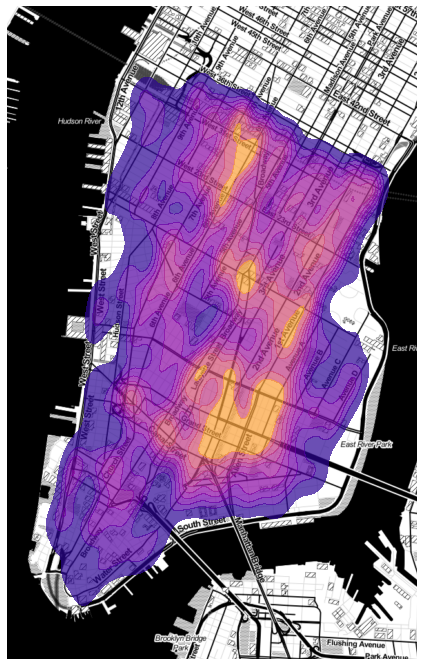

In [10]:
cs_mnh = cs.clip(SO_34_POLY)
make_heatmap(cs_mnh)